## **Machine Learning Algorithm**

## **Type**: Supervised Learning 

## **Regression + Classification**

## **Day 5**: KNN Regression + Gradient Bossting

## **Student**: Muhammad Shafiq

-------------------------------------------

## **K-Nearest Neighbors (KNN) Regression**

K-Nearest Neighbors (KNN) is one of the simplest and most intuitive machine learning algorithms. While it is commonly associated with classification tasks, KNN can also be used for regression.


### **What is KNN Regression?**

KNN regression is a non-parametric method used for predicting continuous values. The core idea is to predict the target value for a new data point by averaging the target values of the K nearest neighbors in the feature space. The distance between data points is typically measured using Euclidean distance, although other distance metrics can be used.

### **How KNN Regression Works**
Choosing the number of neighbors (K): The initial step involves selecting the number of neighbors, K. This choice greatly affects the model's performance. A smaller value of K makes the model more prone to noise, whereas a larger value of K results in smoother predictions.
- **Calculating distances**: For a new data point, calculate the distance between this point and all points in the training set.
- **Finding K nearest neighbors**: Identify the K points in the training set that are closest to the new data point.
- **Predicting the target value**: Compute the average of the target values of the K nearest neighbors and use this as the predicted value for the new data point.

## **import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

### **Generate synthetic data**

In [2]:
# Generate synthetic dataset
X, y = make_regression(n_samples=200, n_features=1, noise=0.1, random_state=42)

### **Split the Dataset**

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Create and Train the KNN Regressor**

In [4]:
# Create and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### **Make Predictions**

In [5]:
# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

### **Evaluate the Model**

In [6]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 133.62045142000457
R-squared: 0.9817384115764595


### **Visualize the Results**

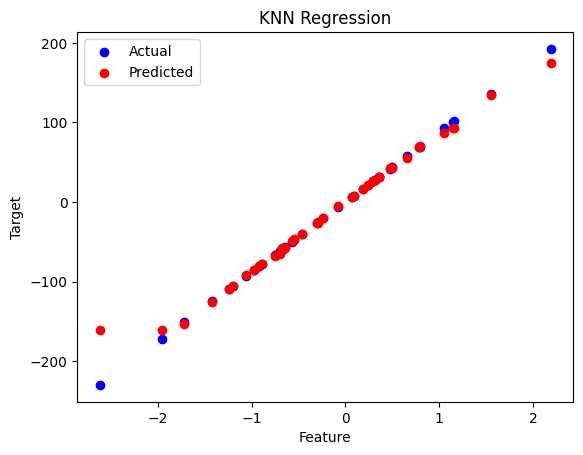

In [7]:
# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('KNN Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

### **Implementing dataset on Diabetic** 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

### **Load the diabetes dataset**

In [13]:
diabetes  = load_diabetes()
X = diabetes.data
y = diabetes.target

# print dataset description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### **Split the dataset**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Standard Scaling**

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Train the Model**

In [17]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
y_pred = knn_regressor.predict(X_test)
print(y_pred)

[125.6 160.2 153.  238.  153.4 150.4 246.2 170.   94.4 104.6 104.  151.6
 104.  166.6  61.4 105.4 263.8 252.  173.6 215.4 161.   86.6 106.6 184.6
 158.2 168.  196.6 145.6  67.6 117.2 158.  166.6  86.4 158.4 166.4 243.6
  73.8 136.8 148.6 106.6  90.  100.6 134.2 147.6 193.4  81.6  83.6  90.8
  84.4 119.2 117.8  88.2 150.6 112.  210.2 130.8  79.4 175.8 113.4  73.
 155.  117.6  58.   94.6 169.4 196.8 214.4 146.4 145.2 111.4 119.2 195.
 204.4  98.6 107.8 192.4 151.  163.6 210.4 218.2 150.8 139.   67.4  82.4
 105.4 113.2 110.4  84.2 159.2]


### **Visulaize the result**

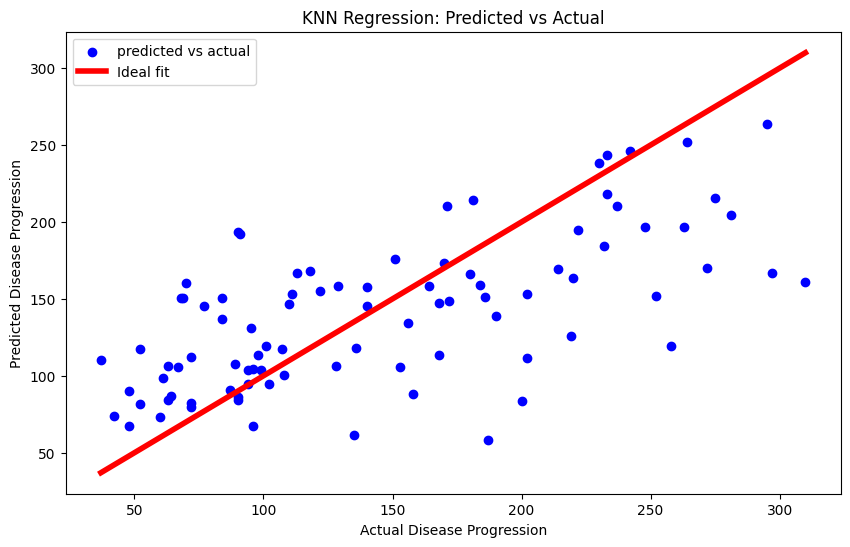

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', label='predicted vs actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],color='red', linewidth=4, label='Ideal fit')
plt.title('KNN Regression: Predicted vs Actual')
plt.xlabel('Actual Disease Progression')
plt.ylabel('Predicted Disease Progression')
plt.legend()
plt.show()

-----------------------

# **Topic 2:Gradient Boosting**

Gradient Boosting is a ensemble learning method used for classification and regression tasks. It is a boosting algorithm which combine multiple weak learner to create a strong predictive model. It works by sequentially training models where each new model tries to correct the errors made by its predecessor.

In gradient boosting each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent. In each iteration the algorithm computes the gradient of the loss function with respect to predictions and then trains a new weak model to minimize this gradient. Predictions of the new model are then added to the ensemble (all models prediction) and the process is repeated until a stopping criterion is met.

## **Shrinkage and Model Complexity**

A key feature of Gradient Boosting is shrinkage which scales the contribution of each new model using learning rate (denoted as 
η).

- **Smaller learning rates**: mean the contribution of each tree is smaller which reduces the risk of overfitting but requires more trees to achieve the same performance.

- **Larger learning rates**: mean each tree has a more significant impact but this can lead to overfitting.

There's a trade off between the learning rate and the number of estimators (trees) a smaller learning rate usually means more trees are required to achieve optimal performance.

## **Working of Gradient Boosting**

### 1. **Sequential Learning Process**

The ensemble consists of multiple trees each trained to correct the errors of the previous one. In the first iteration Tree 1 is trained on the original data 
x
and the true labels 
y
. It makes predictions which are used to compute the errors.

### 2. **Residuals Calculation**

In the second iteration Tree 2 is trained using the feature matrix 
x and the errors from Tree 1 as labels. This means Tree 2 is trained to predict the errors of Tree 1. This process continues for all the trees in the ensemble. Each subsequent tree is trained to predict the errors of the previous tree.


3. Shrinkage
After each tree is trained its predictions are shrunk by multiplying them with the learning rate η which ranges from 0 to 1. This prevents overfitting by ensuring each tree has a smaller impact on the final model.

Once all trees are trained predictions are made by summing the contributions of all the trees. The final prediction is given by the formula:

          ypred =y1 +η⋅r1​ + η⋅r2+⋯+η⋅rN
​
 

Where 

`r1,r2 ,…,rN`  are the errors predicted by each tree.


### **Parameters of gradient Boosting**

- `n_estimators`: This specifies the number of trees (estimators) to be built. A higher value typically improves model performance but increases computation time.

- `learning_rate`: This is the shrinkage parameter. It scales the contribution of each tree.

- `random_state`: It ensures reproducibility of results. Setting a fixed value for random_state ensure that you get the same results every time you run the model.

- `max_features`: This parameter limits the number of features each tree can use for splitting. It helps prevent overfitting by limiting the complexity of each tree and promoting diversity in the model.

### **Implementing on Cancer patient**

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Gradient Boosting Model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.958041958041958
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

